# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#creating reusts and formating as json
btc_price = requests.get(btc_url)
eth_price = requests.get(eth_url)
btc_data = btc_price.json()
eth_data = eth_price.json()


In [6]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40857.60
The current value of your 5.3 ETH is $11505.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-07-9", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                              open    high     low   close   volume    open   
time                                                                          
2021-07-09 00:00:00-04:00  115.735  115.76  115.69  115.69  4602694  432.53   

                                                              
                             high      low   close    volume  
time                                                          
2021-07-09 00:00:00-04:00  435.84  430.714  435.48  59254094

In [9]:
# Pick AGG and SPY close prices
my_agg_value = df_portfolio["AGG"]["close"].item()
my_spy_value = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.445
Current SPY closing price: $334.55


In [12]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21774.00
The current value of your 200 AGG shares is $23138.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
df_savings  = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}
df_savings = pd.DataFrame(df_savings,index=['Crypto','Shares'])
# Display savings DataFrame
display(df_savings)

,Amount
Crypto,52363.317
Shares,44912.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

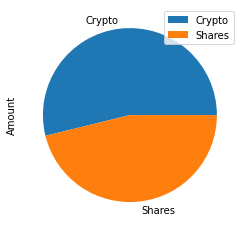

In [19]:
# Plot savings pie chart
df_savings.plot(kind='pie',subplots=True)

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
elif total_savings < emergency_fund:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal in your emergency fund.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-07-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-09', tz='America/New_York').isoformat()

In [25]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                               open      high       low   close   volume   
time                                                                       
2021-02-17 00:00:00-05:00  116.2200  116.2900  116.1450  116.28  6038386   
2021-02-18 00:00:00-05:00  116.1400  116.2800  116.0300  116.20  3910324   
2021-02-19 00:00:00-05:00  116.0187  116.0600  115.7515  115.83  4416681   
2021-02-22 00:00:00-05:00  115.7600  115.8662  115.4800  115.49  4704520   
2021-02-23 00:00:00-05:00  115.7500  115.7500  115.2700  115.52  5373535   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-02-17 00:00:00-05:00  390.42  392.660  389.33  392.43  44671866  
2021-02-18 00:00:00-05:00  389.59  391.515  387.74  390.75  52370380  
2021-02-19 00:00:00-05:00  392.07  392.380  389.55  390.02  66794115  
2021-02-22 00:00:00-05:00  387.06  389.620  386.74  387.11  56604869  
2021-02-23 00:00:00-05:00  384.66  388.945  380.20  387.50  98333278

In [26]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [27]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                               open      high       low   close   volume   
time                                                                       
2021-02-17 00:00:00-05:00  116.2200  116.2900  116.1450  116.28  6038386   
2021-02-18 00:00:00-05:00  116.1400  116.2800  116.0300  116.20  3910324   
2021-02-19 00:00:00-05:00  116.0187  116.0600  115.7515  115.83  4416681   
2021-02-22 00:00:00-05:00  115.7600  115.8662  115.4800  115.49  4704520   
2021-02-23 00:00:00-05:00  115.7500  115.7500  115.2700  115.52  5373535   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2021-02-17 00:00:00-05:00          NaN  390.42  392.660  389.33  392.43   
2021-02-18 00:00:00-05:00    -0.000688  389.59  391.515  387.74  390.75   
2021-02-19 00:00:00-05:00    -0.003184  392.07  392.380  389.55  390.02   
2021-02-22 00:00:00-05:00    -0.002935  387.06  389.620  386.74  387.11   
2021-02-23 00:00:00-05:00     0.000260  384.66  388.945  380.20  387.50   

                                                  
                             volume daily_return  
time                                              
2021-02-17 00:00:00-05:00  44671866          NaN  
2021-02-18 00:00:00-05:00  52370380    -0.004281  
2021-02-19 00:00:00-05:00  66794115    -0.001868  
2021-02-22 00:00:00-05:00  56604869    -0.007461  
2021-02-23 00:00:00-05:00  98333278     0.001007

In [28]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005307,1.003164,1.002590,0.994679,1.003933,1.002155,0.995209,0.997763,0.997257,1.004154,...,0.999598,1.007177,1.007019,1.000817,1.004336,1.004761,1.005435,1.007002,0.999077,0.997626
2,1.009007,1.004946,0.999821,0.991784,1.005523,0.996387,0.992114,1.000337,0.999479,1.005050,...,0.994953,0.998649,1.004705,1.003404,1.000002,1.014681,1.010621,1.004766,0.997842,0.999834
3,1.008823,1.003370,0.996083,0.995583,1.010257,0.989833,0.993873,0.999722,0.998608,1.011168,...,0.992015,0.999123,1.000452,1.000408,0.994744,1.016669,1.007290,0.996832,0.999593,0.997645
4,1.017960,1.000589,1.003073,0.998864,1.012651,0.993988,0.993697,0.997445,0.999363,1.010463,...,0.989310,1.004356,0.999391,0.992017,0.998425,1.022411,1.006456,0.996078,0.998480,1.000914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,51.257642,161.683750,87.469071,132.543116,249.405585,143.592114,141.230764,140.515304,114.516701,94.327571,...,142.102396,54.346235,70.401703,147.254274,71.905507,235.261724,151.733901,61.834222,136.900382,82.312909
7557,51.108761,162.378253,87.299870,133.012994,247.765812,143.289007,142.812869,140.716287,115.341590,95.081025,...,143.066136,54.211072,70.556146,147.532491,72.071094,235.717625,152.218542,62.184883,136.815111,82.905630
7558,50.919986,162.566502,87.004766,133.026671,250.042534,143.770706,140.933612,140.749408,115.739110,95.245925,...,144.353170,53.778302,70.607968,147.697374,72.236057,235.384169,152.253600,62.312840,136.249240,83.115202
7559,50.696695,162.670812,86.620870,134.454428,251.089791,143.747092,140.524926,140.461375,116.687934,95.456145,...,144.738156,53.543897,70.494616,147.768771,72.011246,235.981812,152.205275,62.680564,136.191970,82.690818


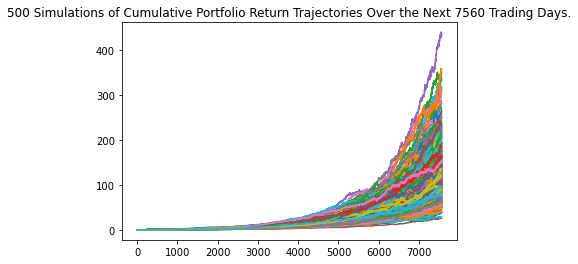

In [29]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

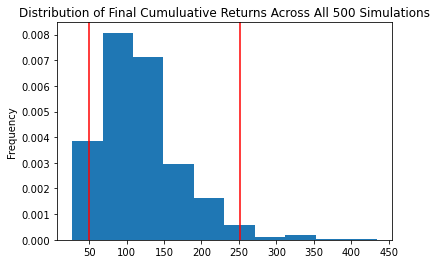

In [31]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
print(MC_tbl)

count           500.000000
mean            120.118465
std              55.180598
min              27.384984
25%              81.870157
50%             110.138115
75%             144.174110
max             433.716246
95% CI Lower     49.997664
95% CI Upper    250.915421
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_tbl[8]*initial_investment,2)
ci_upper = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $999953.28 and $5018308.42


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_tbl[8]*initial_investment,2)
ci_upper = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1499929.93 and $7527462.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001179,0.998807,1.001585,0.998489,0.994131,0.994527,0.994150,0.999202,0.998237,1.005294,...,1.001890,1.004901,0.998885,1.002035,0.997054,1.004646,1.000010,0.999319,1.004260,1.005482
2,1.002494,1.004181,1.006159,0.995351,0.996770,0.988793,0.993728,0.995742,1.000116,1.015299,...,1.005170,1.002333,0.998014,1.001223,1.002866,1.009339,1.001900,1.003013,1.000418,1.008627
3,1.008894,1.006611,1.008329,0.996165,1.001312,0.989614,0.995351,0.997121,0.998984,1.013245,...,1.002907,1.001570,0.996681,1.003452,1.012912,1.006811,1.003836,1.004469,1.001338,1.005924
4,1.012007,1.009082,1.009734,1.005276,0.999605,0.996317,0.989760,0.998535,1.003920,1.014038,...,1.003418,1.003265,0.993950,1.001332,1.009911,1.009349,1.003891,1.003832,0.998597,1.007725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.665398,1.636078,1.521903,1.594697,1.406660,1.920042,1.747763,2.270133,1.827244,1.518340,...,1.690521,1.661470,1.517956,1.600615,1.751324,1.935403,1.432383,1.794917,1.637387,1.829735
1257,1.655687,1.641350,1.520422,1.601683,1.408670,1.916820,1.752301,2.268185,1.822777,1.514482,...,1.688030,1.657919,1.521669,1.604026,1.749490,1.943848,1.433741,1.797300,1.644484,1.824460
1258,1.659401,1.642222,1.516813,1.598368,1.406582,1.907811,1.765171,2.266977,1.838556,1.516485,...,1.683860,1.654746,1.532413,1.603537,1.758366,1.941479,1.432422,1.801104,1.642570,1.828575
1259,1.663462,1.646374,1.518679,1.608501,1.412092,1.917518,1.760288,2.280896,1.830729,1.516793,...,1.687477,1.656940,1.530446,1.595279,1.758492,1.951015,1.441772,1.804911,1.647802,1.827114


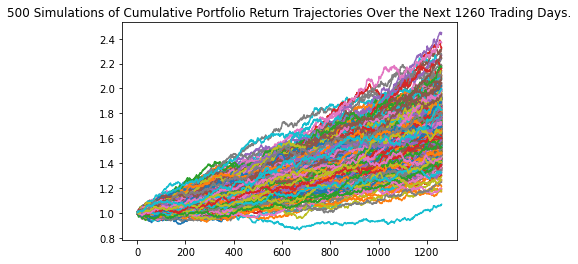

In [39]:
# Plot simulation outcomes
line_plot_2 = MC_five_year.plot_simulation()

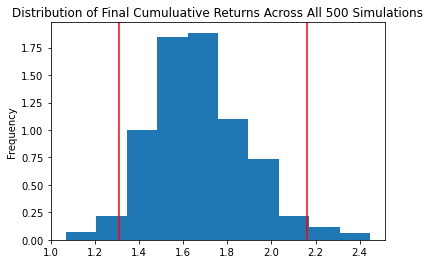

In [41]:
# Plot probability distribution and confidence intervals
dist_plot_2 = MC_five_year.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl_2 = MC_five_year.summarize_cumulative_return()
# Print summary statistics
print(MC_tbl_2)

count           500.000000
mean              1.673858
std               0.212650
min               1.068277
25%               1.526801
50%               1.657912
75%               1.798206
max               2.447309
95% CI Lower      1.311411
95% CI Upper      2.162186
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_tbl_2[8]*initial_investment,2)
ci_upper_five = round(MC_tbl_2[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $26228.23 and $43243.72


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001115,0.996741,1.000891,0.999117,0.996602,0.997714,1.001372,0.998151,0.998773,1.005853,...,0.999570,0.997960,0.997715,0.998358,1.001593,0.997639,1.000663,1.001938,0.998152,1.007713
2,1.001417,1.001749,0.997884,0.993740,0.998234,0.996836,1.008092,0.996937,1.000933,1.009822,...,0.999253,1.000217,1.000953,0.998524,1.006204,0.997137,1.009501,0.997601,0.989935,1.004985
3,0.996470,0.999744,0.993047,0.998398,1.005131,0.998371,1.006988,0.995134,0.998826,1.013005,...,0.999050,0.996182,1.000378,0.995759,1.003779,0.997405,1.008675,0.998654,0.988337,1.007117
4,0.992491,0.998070,0.993918,1.000277,1.006828,0.996684,1.007623,1.000597,0.997536,1.014996,...,0.995975,0.990666,0.993183,0.997589,0.999559,0.992461,1.011415,0.995474,0.984345,1.003835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.672765,3.208009,3.546957,2.962331,2.662240,3.197859,3.163626,3.566636,2.416228,2.767395,...,3.039669,3.909810,1.897522,3.247628,2.900500,3.116814,2.364008,2.533442,2.821693,2.142599
2517,2.672334,3.223875,3.553084,2.961211,2.644089,3.196223,3.158431,3.574612,2.438996,2.762562,...,3.057416,3.897527,1.891098,3.240444,2.897569,3.138089,2.370657,2.532194,2.809105,2.158692
2518,2.658387,3.230272,3.575082,2.970547,2.640778,3.177748,3.165752,3.574009,2.442327,2.766086,...,3.059154,3.880868,1.882030,3.231743,2.907764,3.135659,2.367630,2.536544,2.809950,2.146719
2519,2.663939,3.230907,3.562359,2.958540,2.645788,3.174179,3.158421,3.565697,2.437084,2.767168,...,3.065892,3.893087,1.885903,3.249426,2.901599,3.136155,2.375515,2.535474,2.801461,2.152514


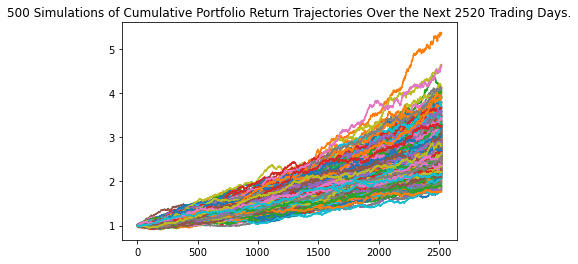

In [47]:
# Plot simulation outcomes
line_plot_3 = MC_ten_year.plot_simulation()

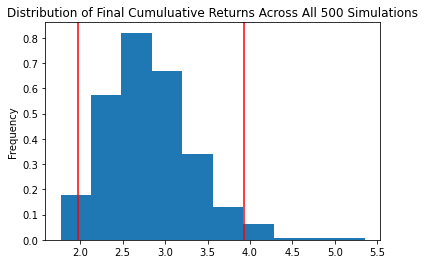

In [48]:
# Plot probability distribution and confidence intervals
dist_plot_3 = MC_ten_year.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl_3 = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
print(MC_tbl_3)

count           500.000000
mean            120.118465
std              55.180598
min              27.384984
25%              81.870157
50%             110.138115
75%             144.174110
max             433.716246
95% CI Lower     49.997664
95% CI Upper    250.915421
Name: 7560, dtype: float64


In [50]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_tbl_3[8]*initial_investment,2)
ci_upper_ten = round(MC_tbl_3[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $999953.28 and $5018308.42
